In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [26]:
unemployment_df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [28]:
unemployment_df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [29]:
# View first 5 rows
unemployment_df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [30]:
# View last 5 rows
unemployment_df.tail(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


# India Unemployment EDA

In [31]:
unemployment_df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [32]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [33]:
# Rename the columns
unemployment_df.rename(columns={'Region':'State',' Date':'Date',' Frequency':'Frequency',
                                ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                                ' Estimated Employed':'Estimated Employed',
                                ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)',
                                'Region.1':'Region'},inplace=True)

In [34]:
unemployment_df

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [35]:
unemployment_df.shape

(267, 9)

In [36]:
# Split 'Date' column into three columns - year, month, and day
unemployment_df[['Day','Month','Year']] = unemployment_df['Date'].str.split('-',expand=True)

In [37]:
# Remove 'Date' column
unemployment_df.drop('Date',axis=1,inplace=True)

In [38]:
# Change data types
unemployment_df['Day'] = pd.to_numeric(unemployment_df['Day'])
unemployment_df['Month'] = pd.to_numeric(unemployment_df['Month'])
unemployment_df['Year'] = pd.to_numeric(unemployment_df['Year'])

In [39]:
unemployment_df.count()

,0
State,267
Frequency,267
Estimated Unemployment Rate (%),267
Estimated Employed,267
Estimated Labour Participation Rate (%),267
Region,267
longitude,267
latitude,267
Day,267
Month,267


In [40]:
# Find duplicated rows
unemployment_df.duplicated().sum()

np.int64(0)

In [41]:
# Check null values
unemployment_df.isna().sum()

,0
State,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region,0
longitude,0
latitude,0
Day,0
Month,0


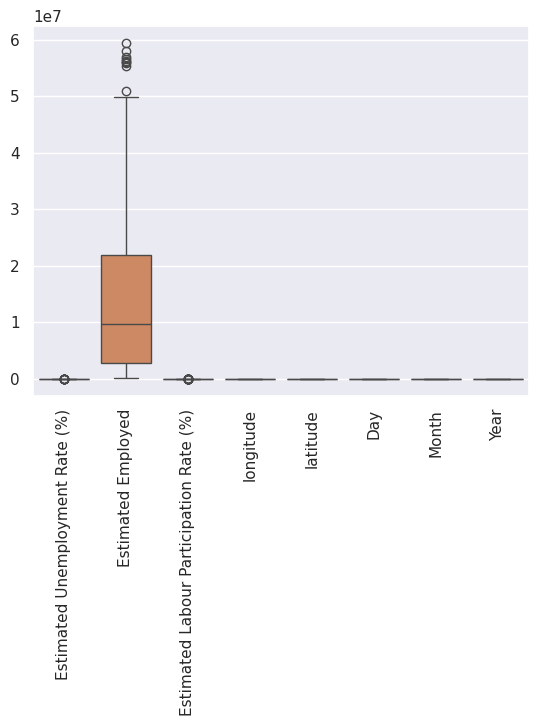

In [42]:
# Detect outliers
sns.boxplot(unemployment_df)
plt.xticks(rotation='vertical')
plt.show();

In [43]:
# Removed outliers
def remove_outliers(df):
  numeric_cols = unemployment_df[['Estimated Unemployment Rate (%)','Estimated Employed',
                                  'Estimated Labour Participation Rate (%)','longitude','latitude',
                                  'Day','Month','Year']]
  Q1 = numeric_cols.quantile(0.25)
  Q2 = numeric_cols.median()
  Q3 = numeric_cols.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  mask = ~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
  return df[mask]

In [44]:
unemployment_rate_df = remove_outliers(unemployment_df)

In [45]:
unemployment_rate_df

,State,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude,Day,Month,Year
0,Andhra Pradesh,M,5.48,16635535,41.02,South,15.9129,79.740,31,1,2020
1,Andhra Pradesh,M,5.83,16545652,40.90,South,15.9129,79.740,29,2,2020
2,Andhra Pradesh,M,5.79,15881197,39.18,South,15.9129,79.740,31,3,2020
3,Andhra Pradesh,M,20.51,11336911,33.10,South,15.9129,79.740,30,4,2020
4,Andhra Pradesh,M,17.43,12988845,36.46,South,15.9129,79.740,31,5,2020
...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,M,7.29,30726310,40.39,East,22.9868,87.855,30,6,2020
263,West Bengal,M,6.83,35372506,46.17,East,22.9868,87.855,31,7,2020
264,West Bengal,M,14.87,33298644,47.48,East,22.9868,87.855,31,8,2020
265,West Bengal,M,9.35,35707239,47.73,East,22.9868,87.855,30,9,2020


# Visualization

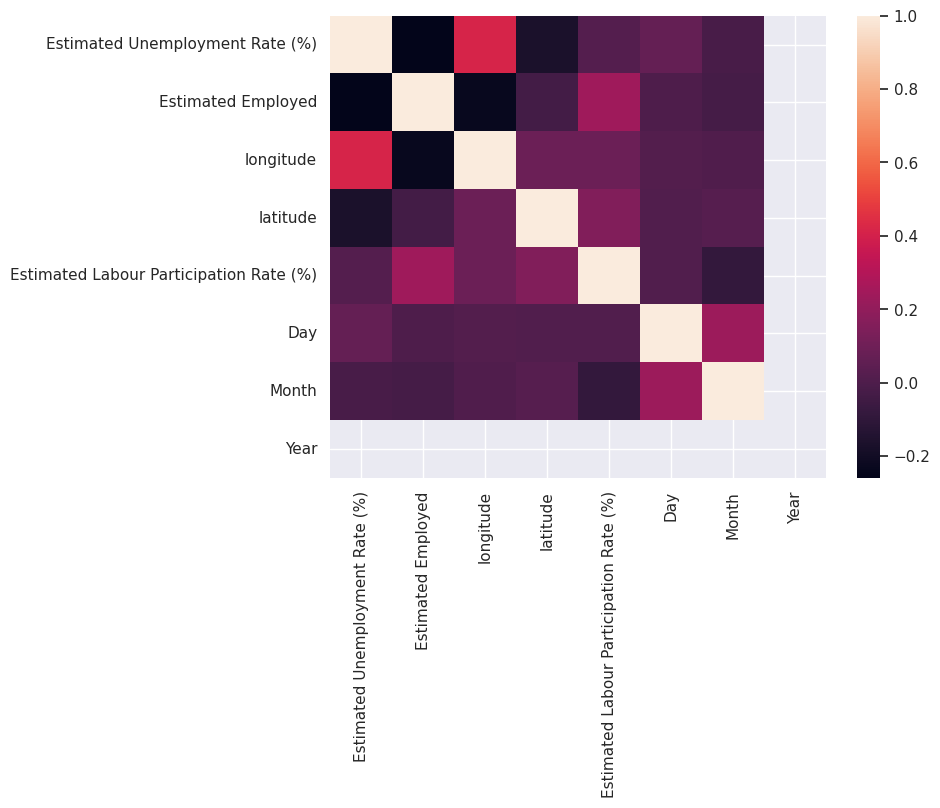

In [46]:
# Create a correlation plot between features
unemployment_corr = unemployment_rate_df[['Estimated Unemployment Rate (%)','Estimated Employed',
                                          'longitude','latitude','Estimated Labour Participation Rate (%)',
                                          'Day','Month','Year']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(unemployment_corr)
plt.show();

In [47]:
stats = unemployment_rate_df[['Estimated Unemployment Rate (%)','Estimated Employed',
                              'Estimated Labour Participation Rate (%)',
                              'Day','Month','Year']]
round(stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),219.0,10.67,7.03,0.50,4.97,9.65,15.48,33.50
Estimated Employed,219.0,13604833.97,11215954.89,193427.00,3441487.50,9975485.00,22699753.50,49801902.00
Estimated Labour Participation Rate (%),219.0,40.44,4.60,28.99,37.29,40.18,43.02,53.22
Day,219.0,30.52,0.67,29.00,30.00,31.00,31.00,31.00
Month,219.0,5.63,2.91,1.00,3.00,6.00,8.00,10.00
Year,219.0,2020.00,0.00,2020.00,2020.00,2020.00,2020.00,2020.00


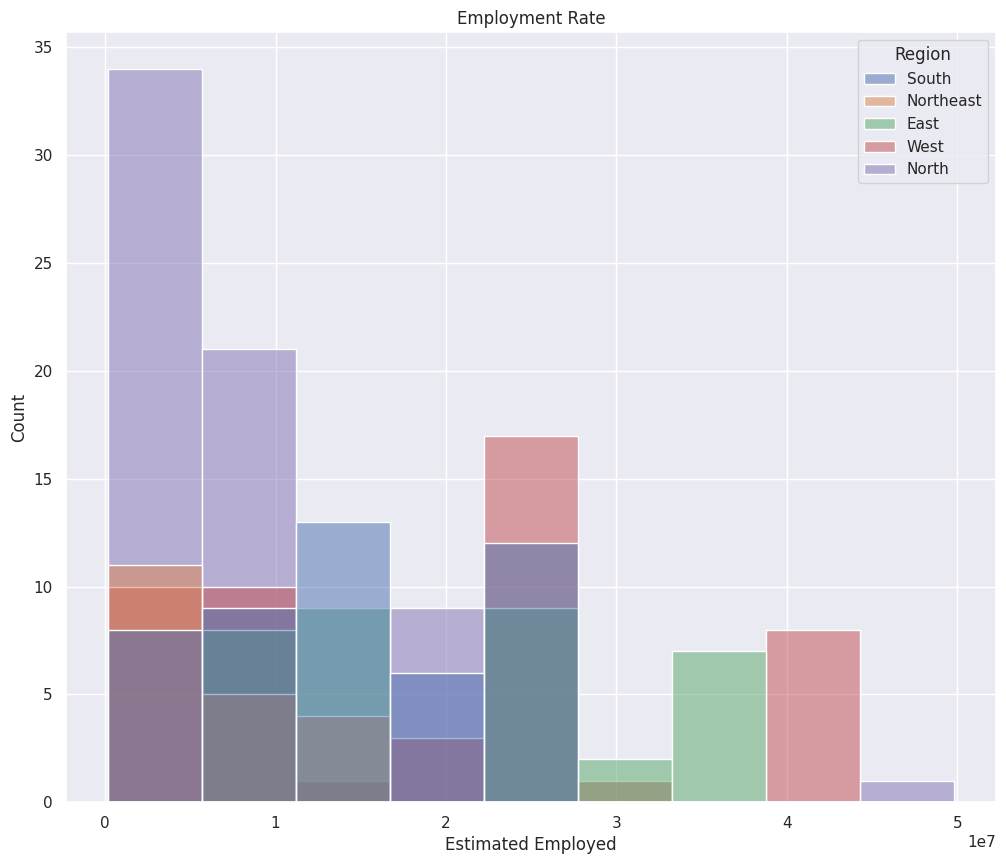

In [51]:
# Visualization of Employment Rate based on Region
plt.figure(figsize=(12,10))
sns.histplot(data=unemployment_rate_df,x='Estimated Employed',hue='Region')
plt.title('Employment Rate')
plt.xlabel('Estimated Employed')
plt.ylabel('Count')
plt.show();

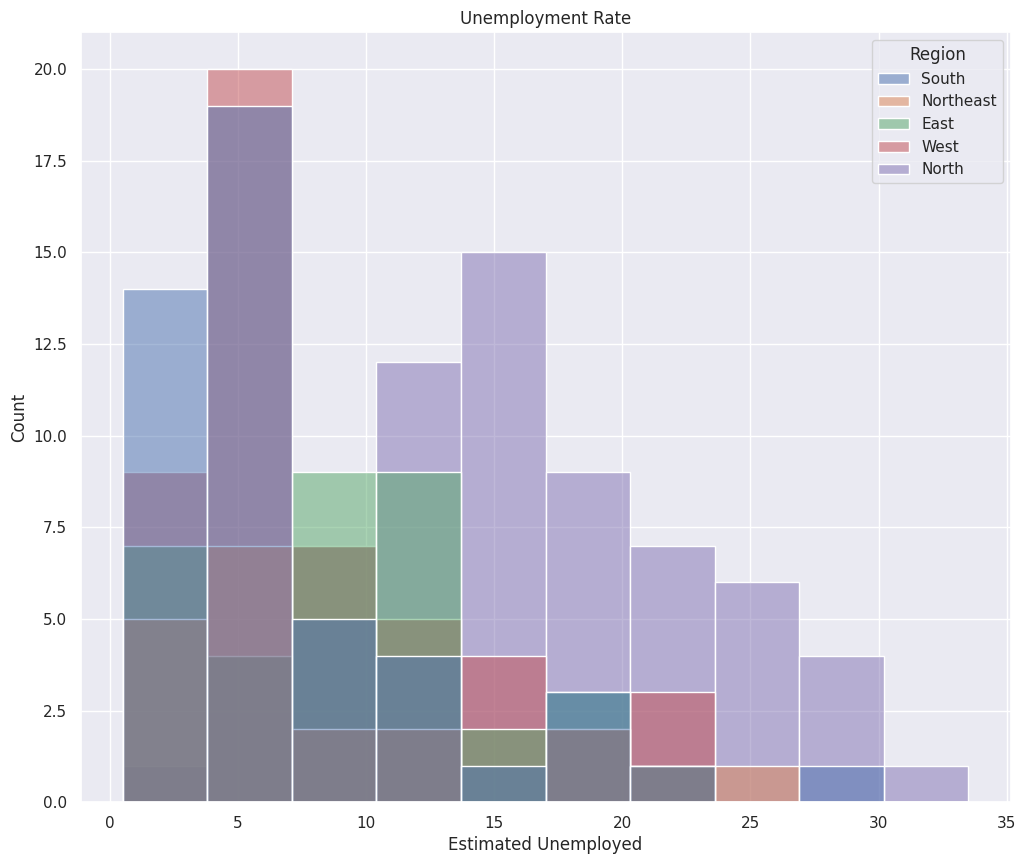

In [52]:
# Visualization of Unemployment Rate based on Region
plt.figure(figsize=(12,10))
sns.histplot(data=unemployment_rate_df,x='Estimated Unemployment Rate (%)',hue='Region')
plt.title('Unemployment Rate')
plt.xlabel('Estimated Unemployed')
plt.ylabel('Count')
plt.show();

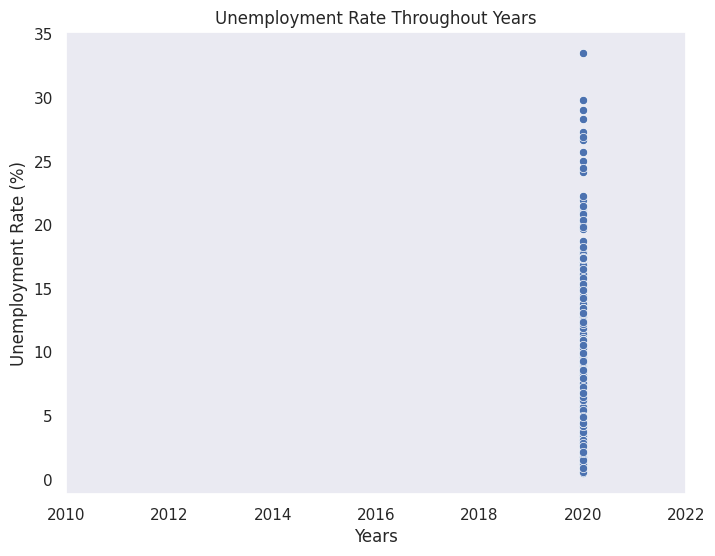

In [53]:
# Displays the relationship between unemployment rate and years
plt.figure(figsize=(8,6))
sns.scatterplot(data=unemployment_rate_df,x='Year',y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Throughout Years')
plt.xlim(2010,2022)
plt.xlabel('Years')
plt.ylabel('Unemployment Rate (%)')
plt.grid()
plt.show();

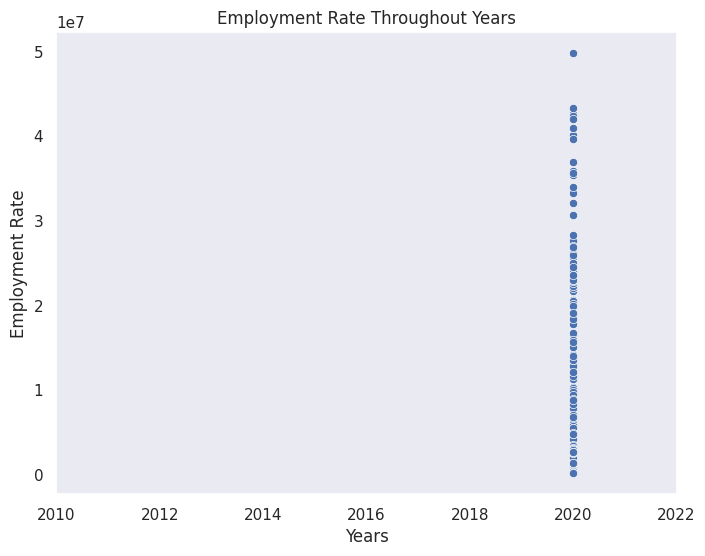

In [54]:
# Displays the relationship between employment rate and years
plt.figure(figsize=(8,6))
sns.scatterplot(data=unemployment_rate_df,x='Year',y='Estimated Employed')
plt.title('Employment Rate Throughout Years')
plt.xlim(2010,2022)
plt.xlabel('Years')
plt.ylabel('Employment Rate')
plt.grid()
plt.show();

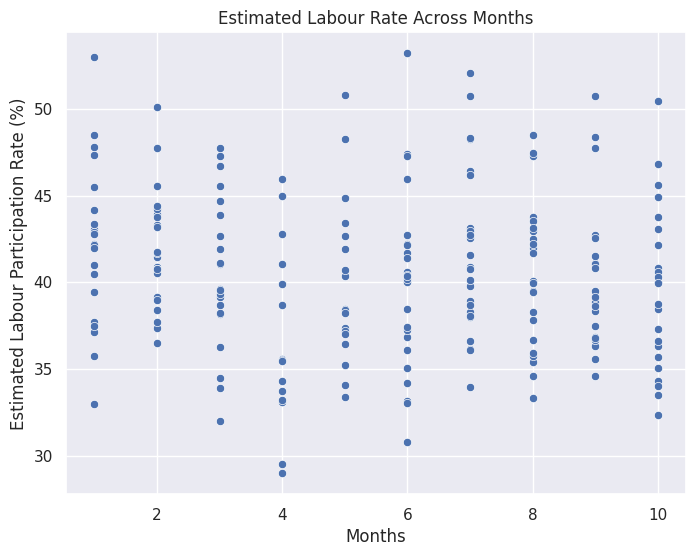

In [55]:
# Displays the relationship between employment estimated labour rate and months
plt.figure(figsize=(8,6))
sns.scatterplot(data=unemployment_rate_df,x='Month',y='Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Rate Across Months')
plt.xlabel('Months')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.show();

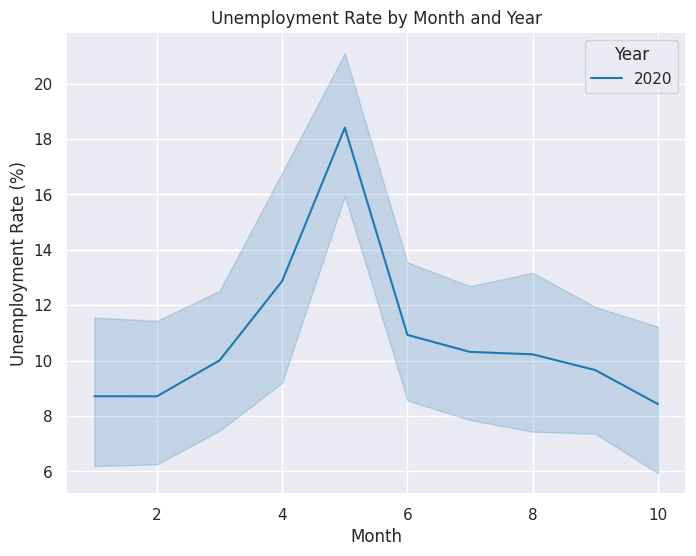

In [61]:
# Displays the unemployment modifications in 2020
plt.figure(figsize=(8,6))
sns.lineplot(data=unemployment_rate_df,x='Month',y='Estimated Unemployment Rate (%)',hue='Year',
             palette='tab10')
plt.title('Unemployment Rate by Month and Year')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.show();

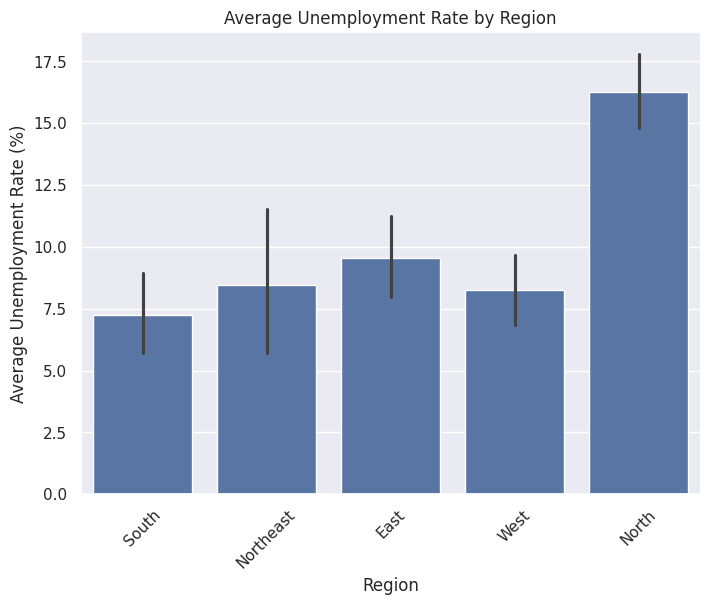

In [62]:
# Displays average unemployment rate by regions
plt.figure(figsize=(8,6))
sns.barplot(data=unemployment_rate_df,x='Region',y='Estimated Unemployment Rate (%)',
            estimator=np.mean)
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=45)
plt.ylabel('Average Unemployment Rate (%)')
plt.show();

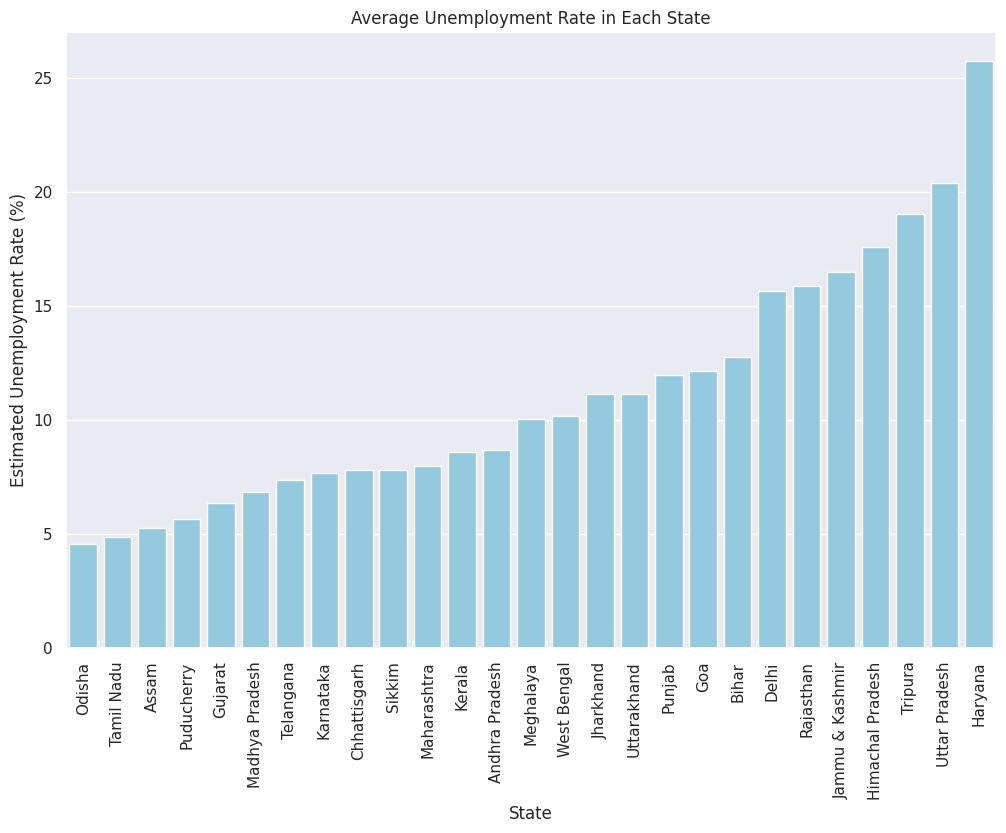

In [69]:
# Displays average unemployment rate by each state
unemp_df = unemployment_rate_df[['Estimated Unemployment Rate (%)','State']].groupby('State').mean().reset_index()
unemp_df = unemp_df.sort_values('Estimated Unemployment Rate (%)')

plt.figure(figsize=(12,8))
sns.barplot(data=unemp_df,x='State',y='Estimated Unemployment Rate (%)',color='skyblue')
plt.title('Average Unemployment Rate in Each State')
plt.xticks(rotation=90)
plt.show();